In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.stats import linregress
from IPython.display import display

import seaborn as sns

In [2]:
# Read the data form the excel file

# Read Excel file into a DataFrame
data = pd.read_excel('shs_ipat_data.xlsx', sheet_name='Germany', index_col=0, na_values=['nan', '0'])


# Separate the data for with the factors for the ipat decomposition

ipat = data[['CD', 'Population', 'HH / Pop', 'DW / HH', 'new DW / tot DW', 'sqm / new DW [sqm]','CD / sqm [t / sqm]', 'DW / Pop', 'Rooms / new DW', 'sqm / Rooms', 'new DW']].copy()

#Check that all the values are floats and in case they are not, convert them to floats
for column in ipat.columns:
    ipat[column] = pd.to_numeric(ipat[column], errors='coerce')

# Remove rows with invalid values
ipat = ipat.dropna()

display(ipat)


,CD,Population,HH / Pop,DW / HH,new DW / tot DW,sqm / new DW [sqm],CD / sqm [t / sqm],DW / Pop,Rooms / new DW,sqm / Rooms,new DW
Year,,,,,,,,,,,
2008.0,6.401112,82002000.0,0.488720,0.979835,0.003877,115.793138,0.363122,0.478865,5.010208,23.111444,172269.0
2009.0,5.682600,81802000.0,0.491284,0.980155,0.003466,115.596478,0.360091,0.481534,4.954680,23.330766,155268.0
2010.0,6.197441,81752000.0,0.492967,0.970365,0.003582,115.385164,0.383386,0.478358,4.907028,23.514266,157106.0
2011.0,7.607512,80328000.0,0.491846,0.993572,0.004106,115.617982,0.408216,0.488684,4.840209,23.886979,180050.0
2012.0,7.415013,80524000.0,0.493108,0.992939,0.004480,114.275523,0.367389,0.489626,4.711517,24.254507,196293.0
2013.0,7.751140,80767000.0,0.494422,0.991966,0.004756,112.427480,0.365948,0.490450,4.590503,24.491320,210553.0
2014.0,8.206850,81198000.0,0.495369,0.990330,0.005426,109.846382,0.345697,0.490579,4.440237,24.738856,240786.0
2015.0,7.912674,82176000.0,0.496179,0.982377,0.005411,108.952738,0.335098,0.487435,4.354423,25.021166,242974.0
2016.0,8.306510,82522000.0,0.496352,0.984046,0.005847,105.559752,0.333917,0.488434,4.193306,25.173399,270830.0


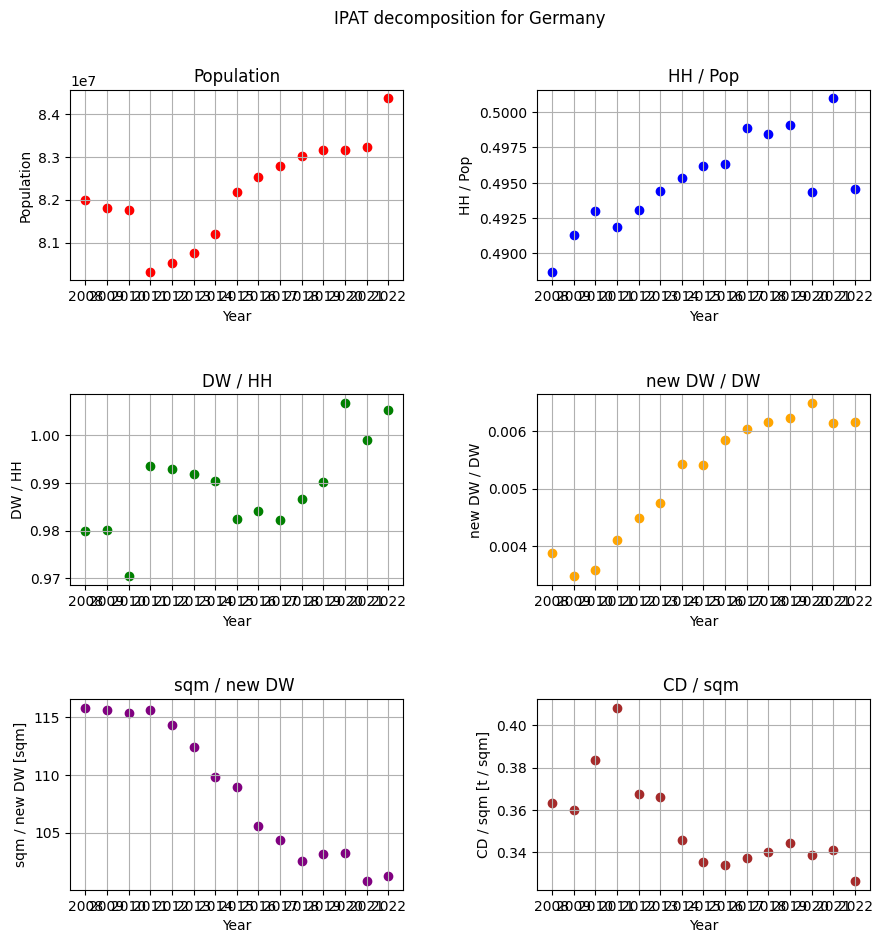

In [3]:
# Plots graphs for every column in the ipat decomposition with nice different colors

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index, ipat['Population'], color='red', marker='o')
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index, ipat['HH / Pop'], color='blue', marker='o')
axs[0, 1].set_title('HH / Pop')
axs[0,1].set_ylabel('HH / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index, ipat['DW / HH'], color='green', marker='o')
axs[1, 0].set_title('DW / HH')
axs[1,0].set_ylabel('DW / HH')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index, ipat['new DW / tot DW'], color='orange', marker='o')
axs[1, 1].set_title('new DW / DW')
axs[1,1].set_ylabel('new DW / DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index, ipat['sqm / new DW [sqm]'], color='purple', marker='o')
axs[2, 0].set_title('sqm / new DW ')
axs[2,0].set_ylabel('sqm / new DW [sqm]')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index, ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

plt.show()

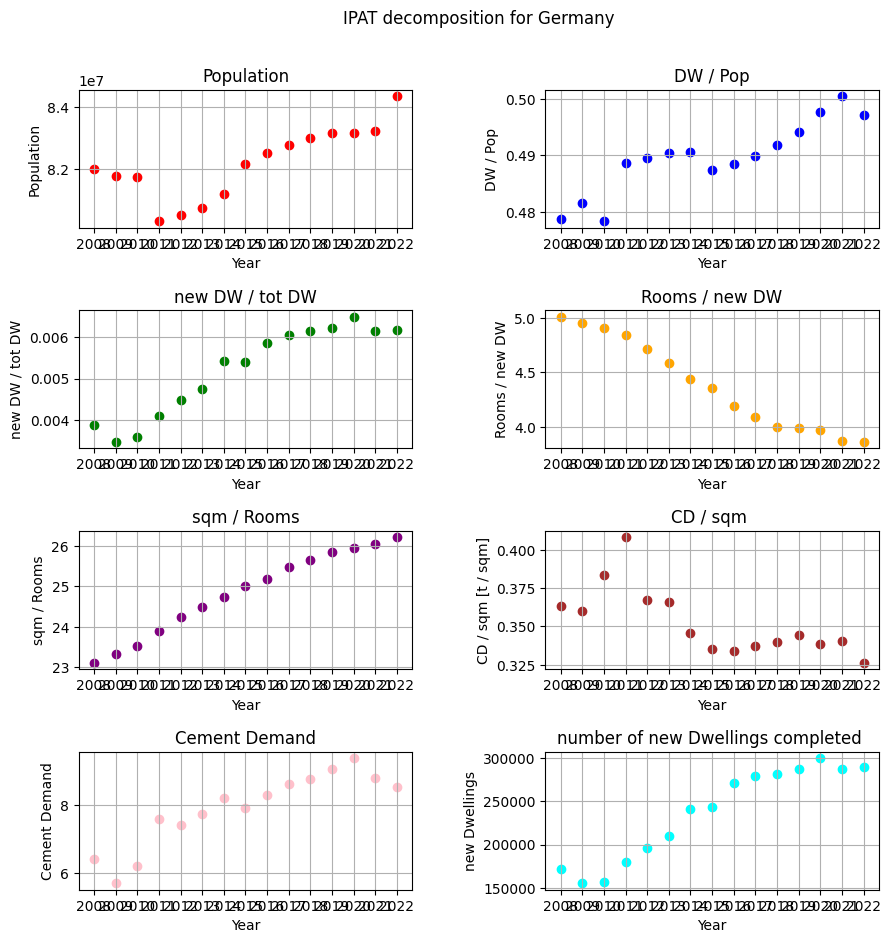

In [4]:
# Plots graphs for every column in the ipat decomposition with nice different colors

fig, axs = plt.subplots(4, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index, ipat['Population'], color='red', marker='o')
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index, ipat['DW / Pop'], color='blue', marker='o')
axs[0, 1].set_title('DW / Pop')
axs[0,1].set_ylabel('DW / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index, ipat['new DW / tot DW'], color='green', marker='o')
axs[1, 0].set_title('new DW / tot DW')
axs[1,0].set_ylabel('new DW / tot DW')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index, ipat['Rooms / new DW'], color='orange', marker='o')
axs[1, 1].set_title('Rooms / new DW')
axs[1,1].set_ylabel('Rooms / new DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index, ipat['sqm / Rooms'], color='purple', marker='o')
axs[2, 0].set_title('sqm / Rooms')
axs[2,0].set_ylabel('sqm / Rooms')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index, ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

axs[3, 0].scatter(ipat.index, ipat['CD'], color='pink', marker='o')
axs[3, 0].set_title('Cement Demand')
axs[3,0].set_ylabel('Cement Demand')
axs[3,0].set_xlabel('Year')
axs[3,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[3,0].grid()

axs[3, 1].scatter(ipat.index, ipat['new DW'], color='cyan', marker='o')
axs[3, 1].set_title('number of new Dwellings completed ')
axs[3,1].set_ylabel('new Dwellings')
axs[3,1].set_xlabel('Year')
axs[3,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[3,1].grid()

plt.show()

In [5]:
# Compute a linear regression for every column in the ipat decomposition, computing also the CHI squared value and saves the data in a dictionary

ipat_regression = {}

for column in ipat.columns:
    slope, intercept, r_value, p_value, std_err = linregress(ipat.index, ipat[column])
    ipat_regression[column] = {'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}

# moves the dictionary into a dataframe and plots it

ipat_regression_df = pd.DataFrame(ipat_regression).T
display(ipat_regression_df)


,slope,intercept,r_value,p_value,std_err
CD,0.220145,-4.356772e+02,0.897286,5.759471e-06,0.030039
Population,201210.714286,-3.232529e+08,0.783302,5.519606e-04,44288.442981
HH / Pop,0.000573,-6.591841e-01,0.772246,7.410289e-04,0.000131
DW / HH,0.001485,-2.003420e+00,0.673386,5.925911e-03,0.000452
new DW / tot DW,0.000226,-4.500114e-01,0.944779,1.146109e-07,0.000022
sqm / new DW [sqm],-1.273827,2.675350e+03,-0.971613,1.618393e-09,0.086024
CD / sqm [t / sqm],-0.003585,7.575841e+00,-0.727774,2.100498e-03,0.000937
DW / Pop,0.001300,-2.129426e+00,0.901069,4.555429e-06,0.000174
Rooms / new DW,-0.092772,1.913224e+02,-0.985773,1.878548e-11,0.004387
sqm / Rooms,0.231295,-4.412103e+02,0.990576,1.306215e-12,0.008870


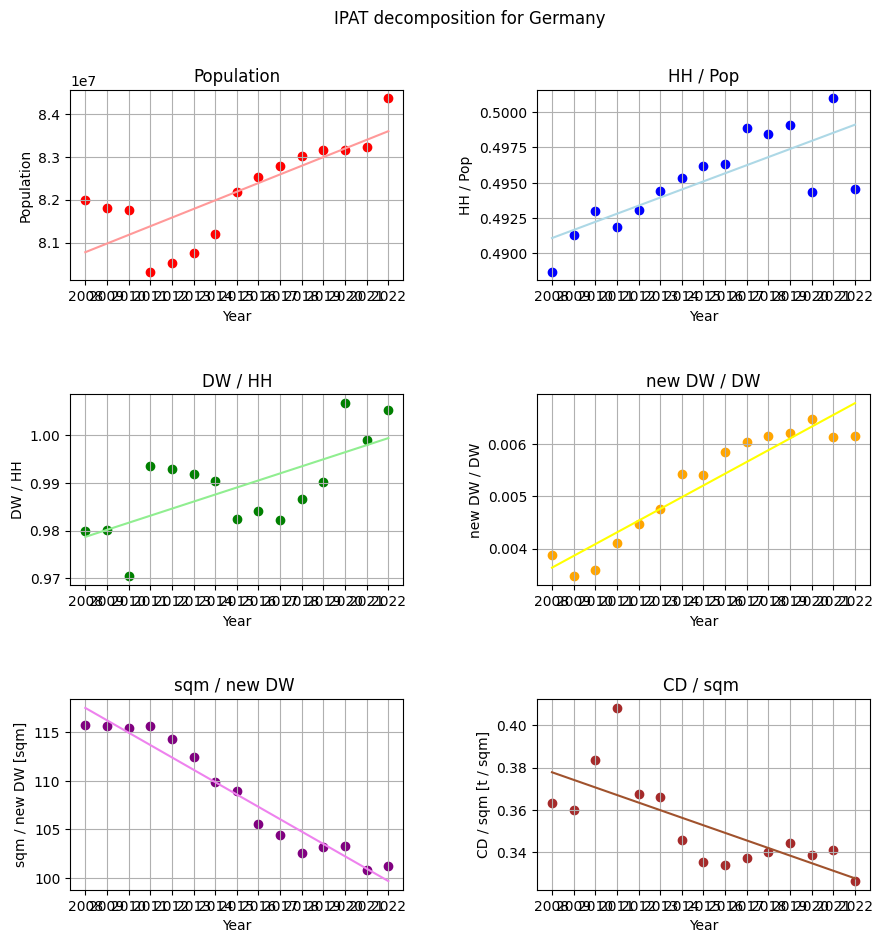

In [6]:
# Redoes the plots with the linear regression

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index,ipat['Population'], color='red', marker='o')
axs[0, 0].plot(ipat.index, ipat_regression_df['slope']['Population']*ipat.index + ipat_regression_df['intercept']['Population'], color=(1.0, 0.6, 0.6))
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index,ipat['HH / Pop'], color='blue', marker='o')
axs[0, 1].plot(ipat.index, ipat_regression_df['slope']['HH / Pop']*ipat.index + ipat_regression_df['intercept']['HH / Pop'], color='lightblue')
axs[0, 1].set_title('HH / Pop')
axs[0,1].set_ylabel('HH / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index,ipat['DW / HH'], color='green', marker='o')
axs[1, 0].plot(ipat.index, ipat_regression_df['slope']['DW / HH']*ipat.index + ipat_regression_df['intercept']['DW / HH'], color='lightgreen')
axs[1, 0].set_title('DW / HH')
axs[1,0].set_ylabel('DW / HH')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index,ipat['new DW / tot DW'], color='orange', marker='o')
axs[1, 1].plot(ipat.index, ipat_regression_df['slope']['new DW / tot DW']*ipat.index + ipat_regression_df['intercept']['new DW / tot DW'], color='yellow')
axs[1, 1].set_title('new DW / DW')
axs[1,1].set_ylabel('new DW / DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index,ipat['sqm / new DW [sqm]'], color='purple',marker='o')
axs[2, 0].plot(ipat.index, ipat_regression_df['slope']['sqm / new DW [sqm]']*ipat.index + ipat_regression_df['intercept']['sqm / new DW [sqm]'], color='violet')
axs[2, 0].set_title('sqm / new DW ')
axs[2,0].set_ylabel('sqm / new DW [sqm]')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index,ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].plot(ipat.index, ipat_regression_df['slope']['CD / sqm [t / sqm]']*ipat.index + ipat_regression_df['intercept']['CD / sqm [t / sqm]'], color='sienna')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

plt.show()



# Plotting Setup

In [188]:
import os

os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"
print(os.getenv("PATH"))

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rc("text", usetex=True)
mpl.rc("text.latex", preamble=r"\usepackage{amsmath}")
# sns.set_theme()

legend_line_width = 5

presentation_margins = {"left": 0.1, "right": 0.95, "top": 0.9, "bottom": 0.1}
presentation_fig_size = (6, 5)

report_margins_one = {"left": 0.2, "right": 0.9, "top": 0.9, "bottom": 0.2}
report_margins_two = {
    "left": 0.08,
    "right": 0.92,
    "top": 0.8,
    "bottom": 0.2,
    "wspace": 0.4,
}
report_fig_size_one = (6.4, 4.8)
report_fig_size_two = (6.4, 2.4)

colors = [
    "#4F8FCC",
    "#B51F1F",
    "#D98336",
    "#FDE74C",
    "#BBBDF6",
    "#007480",
    "#32DE8A",
    "#CAC7C7",
]

/Users/tk/Documents/Studium/SHS_Economic_Growth_and_Sustainability/venv/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/Library/TeX/texbin:/Library/TeX/texbin:/Library/TeX/texbin:/Library/TeX/texbin:/Library/TeX/texbin


In [167]:
def plot(
    ax,
    data1,
    title="",
    xlabel="",
    ylabel="",
    marker="x",
    label="",
    color="tab:blue",
    data2=None,
    ylabel2="",
    marker2="o",
    label2="",
    color2="tab:red",
    two_axis=False,
):
    ax: plt.Axes
    plts =  ax.plot(data1.index, data1, marker=marker, color=color, label=label)
    if two_axis:
        ax2 = ax.twinx()
        ax2.set_ylabel(ylabel2)
    else:
        ax2 = ax
    if data2 is not None:
        plts += ax2.plot(data2.index, data2, marker=marker2, color=color2, label=label2)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks(data1.index)
    
    if label:
        ax.legend(plts, [label, label2] if data2 is not None else [label])
    
    ax.grid()

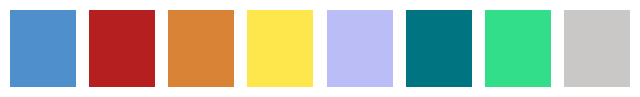

In [168]:
def display_colors(color_list):
    fig, ax = plt.subplots(1, len(color_list), figsize=(len(color_list), 1))
    for i, color in enumerate(color_list):
        ax[i].imshow([[np.array([int(color[i:i+2], 16) / 255 for i in (1, 3, 5)])]], extent=[0, 1, 0, 1], aspect='auto')
        ax[i].axis('off')
    plt.show()

display_colors(colors)

# Loading Data

In [169]:
years = np.arange(1994, 2023)
ipat_years = np.array([1995, 2000, 2005, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
cols = ['CD tot', 'share', 'Pop', 'DW tot', 'DW new', 'LR new', 'A new']

data = pd.read_excel('shs_ipat_data.xlsx', sheet_name='Germany', index_col=0, na_values=['nan', '0'])[cols]
data = data.loc[years]

data['CD tot'] *= 1_000_000
data['Pop'] *= 1_000
data['A new'] *= 1_000

In [170]:
data["DW add"] = data["DW tot"].diff()
data["DW repl"] = data["DW new"] - data["DW add"]

data["share add"] = data["DW add"] / data["DW new"] * 100
data["share repl"] = data["DW repl"] / data["DW new"] * 100

cd_share_mean = data.loc[years[years >= 2015], "share"].mean()

data.loc[[1995, 2000, 2005], "share"] = cd_share_mean

data["CD"] = data["CD tot"] * data["share"] / 100

data

,CD tot,share,Pop,DW tot,DW new,LR new,A new,DW add,DW repl,share add,share repl,CD
Year,,,,,,,,,,,,
1994.0,NaN,NaN,81538000,34700242,557938,2428895,51183000,NaN,NaN,NaN,NaN,NaN
1995.0,38492000.0,30.425,81817000,35266623,584760,2493667,52413000,566381,18379,96.857001,3.142999,11711191.0
1996.0,NaN,NaN,82012000,35789160,543186,2328154,49021000,522537,20649,96.19854,3.80146,NaN
1997.0,NaN,NaN,82057000,36330848,560965,2458034,51976000,541688,19277,96.5636,3.4364,NaN
1998.0,NaN,NaN,82037000,36796664,487067,2247332,48051000,465816,21251,95.636945,4.363055,NaN
1999.0,NaN,NaN,82163000,37240290,460546,2206902,47916000,443626,16920,96.3261,3.6739,NaN
2000.0,35782000.0,30.425,82260000,37629526,412320,2042885,44704000,389236,23084,94.401436,5.598564,10886673.5
2001.0,NaN,NaN,82440000,37921153,319474,1626675,36118000,291627,27847,91.283485,8.716515,NaN
2002.0,NaN,NaN,82537000,38157911,282834,1465613,32941000,236758,46076,83.709172,16.290828,NaN


In [171]:
share_add = data.loc[[2009, 2011], "share add"].mean()
share_repl = data.loc[[2009, 2011], "share repl"].mean()

data.loc[2010, "share add"] = share_add
data.loc[2010, "share repl"] = share_repl

data.loc[2010, "DW add"] = int(data.loc[2010, "DW new"] * data.loc[2010, "share add"] / 100)
data.loc[2010, "DW repl"] = int(data.loc[2010, "DW new"] * data.loc[2010, "share repl"] / 100)

data

,CD tot,share,Pop,DW tot,DW new,LR new,A new,DW add,DW repl,share add,share repl,CD
Year,,,,,,,,,,,,
1994.0,NaN,NaN,81538000,34700242,557938,2428895,51183000,NaN,NaN,NaN,NaN,NaN
1995.0,38492000.0,30.425,81817000,35266623,584760,2493667,52413000,566381,18379,96.857001,3.142999,11711191.0
1996.0,NaN,NaN,82012000,35789160,543186,2328154,49021000,522537,20649,96.19854,3.80146,NaN
1997.0,NaN,NaN,82057000,36330848,560965,2458034,51976000,541688,19277,96.5636,3.4364,NaN
1998.0,NaN,NaN,82037000,36796664,487067,2247332,48051000,465816,21251,95.636945,4.363055,NaN
1999.0,NaN,NaN,82163000,37240290,460546,2206902,47916000,443626,16920,96.3261,3.6739,NaN
2000.0,35782000.0,30.425,82260000,37629526,412320,2042885,44704000,389236,23084,94.401436,5.598564,10886673.5
2001.0,NaN,NaN,82440000,37921153,319474,1626675,36118000,291627,27847,91.283485,8.716515,NaN
2002.0,NaN,NaN,82537000,38157911,282834,1465613,32941000,236758,46076,83.709172,16.290828,NaN


## LaTeX Table

In [172]:
years = np.arange(1995, 2023)

cols = ["CD tot", "share", "CD", "Pop", "DW tot", "DW new", "LR new", "A new"]

data_latex = data[cols].copy()

data_latex["CD tot"] /= 1_000_000
data_latex["CD"] /= 1_000_000
data_latex["Pop"] /= 1_000
data_latex["DW tot"] /= 1_000
data_latex["DW new"] /= 1_000
data_latex["LR new"] /= 1_000
data_latex["A new"] /= 1_000

latex_table = data_latex.to_latex(
    index=True,
    float_format="{:0.2f}".format,
)
print(
    latex_table
    .replace(".000000", "")
    .replace("NaN", "{\\textemdash}")
    .replace(".00", "")
    .replace(f"{cd_share_mean:.2f}", f"{cd_share_mean:.2f}*")
)

\begin{tabular}{lllllllll}
\toprule
 & CD tot & share & CD & Pop & DW tot & DW new & LR new & A new \\
Year &  &  &  &  &  &  &  &  \\
\midrule
1994 & {\textemdash} & {\textemdash} & {\textemdash} & 81538 & 34700.24 & 557.94 & 2428.89 & 51183 \\
1995 & 38.49 & 30.42* & 11.71 & 81817 & 35266.62 & 584.76 & 2493.67 & 52413 \\
1996 & {\textemdash} & {\textemdash} & {\textemdash} & 82012 & 35789.16 & 543.19 & 2328.15 & 49021 \\
1997 & {\textemdash} & {\textemdash} & {\textemdash} & 82057 & 36330.85 & 560.97 & 2458.03 & 51976 \\
1998 & {\textemdash} & {\textemdash} & {\textemdash} & 82037 & 36796.66 & 487.07 & 2247.33 & 48051 \\
1999 & {\textemdash} & {\textemdash} & {\textemdash} & 82163 & 37240.29 & 460.55 & 2206.90 & 47916 \\
2000 & 35.78 & 30.42* & 10.89 & 82260 & 37629.53 & 412.32 & 2042.88 & 44704 \\
2001 & {\textemdash} & {\textemdash} & {\textemdash} & 82440 & 37921.15 & 319.47 & 1626.67 & 36118 \\
2002 & {\textemdash} & {\textemdash} & {\textemdash} & 82537 & 38157.91 & 282.83 & 146

# Preliminary Analysis

## New Dwellings

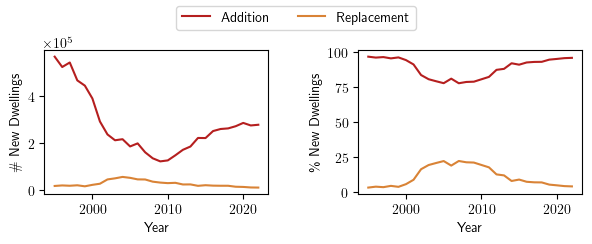

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=report_fig_size_two)
fig.subplots_adjust(**report_margins_two)

ax1.plot(data.loc[years, "DW add"], label="Addition", color=colors[1])
ax1.plot(data.loc[years, "DW repl"], label="Replacement", color=colors[2])

ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel("Year")
ax1.set_ylabel("\\# New Dwellings")

ax2.plot(data.loc[years, "share add"], color=colors[1])
ax2.plot(data.loc[years, "share repl"], color=colors[2])

ax2.set_xlabel("Year")
ax2.set_ylabel("\\% New Dwellings")

fig.legend(loc="upper center", ncol=2)

fig.savefig("figures/new_dwellings_combined.pdf")

plt.show()

## Cement Demand

In [129]:
data.loc[ipat_years[ipat_years > 2015], 'share'].mean()

30.52857142857142

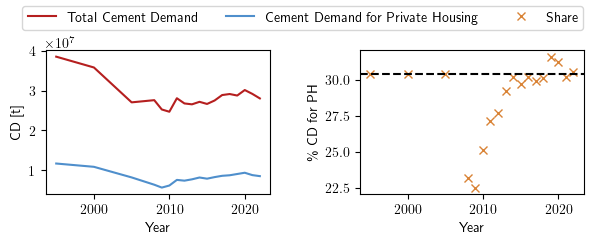

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=report_fig_size_two)
fig.subplots_adjust(**report_margins_two)

share_mean = data.loc[ipat_years[ipat_years >= 2015], 'share'].mean()

ax1.plot(data.loc[ipat_years, "CD tot"], label="Total Cement Demand", color=colors[1])
ax1.plot(data.loc[ipat_years, "CD"], label="Cement Demand for Private Housing", color=colors[0])

ax1.set_xlabel("Year")
ax1.set_ylabel("CD [t]")

ax2.plot(data.loc[years, "share"], 'x', color=colors[2], label="Share")
ax2.axline([years[0], share_mean], [years[-1], share_mean], color='black', linestyle='--')

ax2.set_xlabel("Year")
ax2.set_ylabel("\\% CD for PH")

fig.legend(loc="upper center", ncol=3)

fig.savefig("figures/cement_demand_combined.pdf")

plt.show()

## Box Plot for Enrico

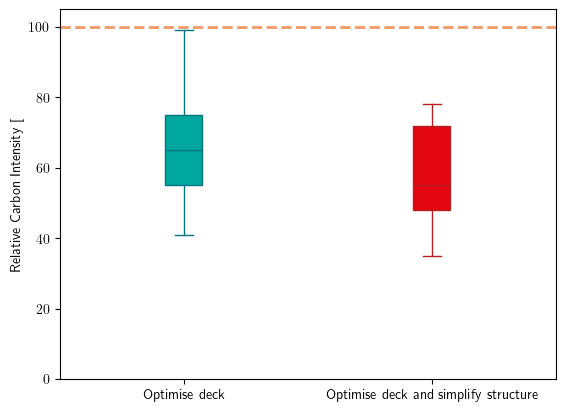

In [31]:
# Generate some sample data
box_data = [
    {'med': 65, 'q1': 55, 'q3': 75, 'whislo': 41, 'whishi': 99, 'fliers': []},
    {'med': 55, 'q1': 48, 'q3': 72, 'whislo': 35, 'whishi': 78, 'fliers': []}
]

# Create a figure and axis
fig, ax = plt.subplots()

# Create boxplot and specify colors for each element
bp = ax.bxp(box_data, patch_artist=True)

# Define colors for the boxes and whiskers
box_colors = ['#00A79F', '#E30613']
whisker_colors = ['#007480','#007480', '#B51F1F', '#B51F1F']


# Customize the colors of the boxplot elements
for element in ['caps', 'whiskers']:
    for i in range(len(bp[element])):
        bp[element][i].set_color(whisker_colors[i % len(whisker_colors)])

for i in range(len(bp['boxes'])):
    bp['boxes'][i].set_color(whisker_colors[2*i % len(whisker_colors)])

for i in range(len(bp['medians'])):
    bp['medians'][i].set_color(whisker_colors[2*i % len(whisker_colors)])

for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

ax.axline([1, 100], [2, 100], color='#F39869', linestyle='--', linewidth=2)

ax.set_ylim(0, 105)

ax.set_ylabel('Relative Carbon Intensity [%]')

ax.set_xticklabels(['Optimise deck', 'Optimise deck and simplify structure'])

fig.savefig('figures/enrico_boxplot.pdf')

# Show the plot
plt.show()

# IPAT

$$
\text{CD}_\text{PH} = (\text{DW}_\text{add} + \text{DW}_\text{repl}) \times \frac{\text{LR}_\text{new}}{\text{DW}_\text{new}} \times \frac{\text{A}_\text{new}}{\text{LR}_\text{new}} \times \frac{\text{CD}_\text{PH}}{\text{A}_\text{new}}
$$

In [174]:
data['DW tot / Pop'] = data['DW tot'] / data['Pop']
data['DW new / DW tot'] = data['DW new'] / data['DW tot']
data['LR new / DW new'] = data['LR new'] / data['DW new']
data['A new / LR new'] = data['A new'] / data['LR new']
data['CD / A new'] = data['CD'] / data['A new']

# ipat_factors = ['Pop', 'tot DW / Pop', 'new DW / tot DW', 'new LR / new DW', 'new sqm / new LR', 'CD / new sqm']
ipat_factors = ['DW add', 'DW repl', 'LR new / DW new', 'A new / LR new', 'CD / A new']


# ipat_labels = [
#     r"$\text{Pop}$",
#     r"$\text{DW}_\text{tot} / \text{Pop}$",
#     r"$\text{DW}_\text{new} / \text{DW}_\text{tot}$",
#     r"$\text{LR}_\text{new} / \text{DW}_\text{new}$",
#     r"$\text{A}_\text{new} / \text{LR}_\text{new}$",
#     r"$\text{CD} / \text{A}_\text{new}$",
# ]

ipat_labels = [
    r"${DW}_\text{add}$",
    r"${DW}_\text{repl}$",
    r"${LR}_\text{new} / {DW}_\text{new}$",
    r"${A}_\text{new} / {LR}_\text{new}$",
    r"${CD} / {A}_\text{new}$",
]

small_ipat_factors = ['A new', 'CD / A new']

small_ipat_labels = [
    r"$A_\text{new}$", 
    r"${CD} / {A}_\text{new}$",
]

small_ipat_colors = [colors[1], colors[-2]]
ipat_colors = colors[1:len(ipat_factors)+1]

other_color = colors[-1]
cement_color = colors[0]

# https://coolors.co/b51f1f-d98336-fde74c-bbbdf6-007480-32de8a

### All IPAT Decompositions
$$
\text{CD}_\text{PH} = \text{Pop} \times \frac{\text{DW}_\text{tot}}{\text{Pop}} \times \frac{\text{DW}_\text{new}}{\text{DW}_\text{tot}} \times \frac{\text{LR}_\text{new}}{\text{DW}_\text{new}} \times \frac{\text{A}_\text{new}}{\text{LR}_\text{new}} \times \frac{\text{CD}_\text{PH}}{\text{A}_\text{new}}
$$

$$
\text{CD}_\text{PH} = (\Delta \text{DW}_\text{tot} + \text{DW}_\text{repl}) \times \frac{\text{LR}_\text{new}}{\text{DW}_\text{new}} \times \frac{\text{A}_\text{new}}{\text{LR}_\text{new}} \times \frac{\text{CD}_\text{PH}}{\text{A}_\text{new}}
$$

$$
\text{CD}_\text{PH} = \text{Pop} \times \frac{\text{DW}_\text{tot}}{\text{Pop}} \times \frac{(\Delta \text{DW}_\text{tot} + \text{DW}_\text{repl})}{\text{DW}_\text{tot}} \times \frac{\text{LR}_\text{new}}{\text{DW}_\text{new}} \times \frac{\text{A}_\text{new}}{\text{LR}_\text{new}} \times \frac{\text{CD}_\text{PH}}{\text{A}_\text{new}}
$$

$$
\text{CD}_\text{PH} = \left(\Delta \text{DW}_\text{tot} + \text{Pop} \times \frac{\text{DW}_\text{tot}}{\text{Pop}} \times \frac{\text{DW}_\text{repl}}{\text{DW}_\text{tot}}\right) \times \frac{\text{LR}_\text{new}}{\text{DW}_\text{new}} \times \frac{\text{A}_\text{new}}{\text{LR}_\text{new}} \times \frac{\text{CD}_\text{PH}}{\text{A}_\text{new}}
$$

## Util + Plotting functions

In [175]:
def calc_change(col, start=years[0], end=years[-1]):
    return (data.loc[end, col] - data.loc[start, col]) / data.loc[start, col]

def calc_cd(col, start=years[0], end=years[-1]):
    return calc_change(col, start, end) * data.loc[start, "CD"]

In [176]:
def waterfall(ax, x, values, colors, title="", text=[], bottom=None, labels=[], ylim=None, width=0.1):
    ax: plt.Axes
    y = 0
    if bottom is None:
        bottom = []
        for val in values:
            bottom.append(y)
            y += val
    ax.bar(x, values, width, bottom=bottom, color=colors)
    
    for i in range(len(values) - 1):
        ax.plot([x[i] -width/2, x[i +1] +width/2], [values[i] + bottom[i], values[i] + bottom[i]], color="black")
        
    for i, t in enumerate(text):
        ax.text(x[i], max(bottom[i], bottom[i] + values[i]), t, ha="center", va="bottom")
       
    ax.set_xticks(list(range(len(labels))))
    ax.set_xticklabels(labels) 
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_title(title)

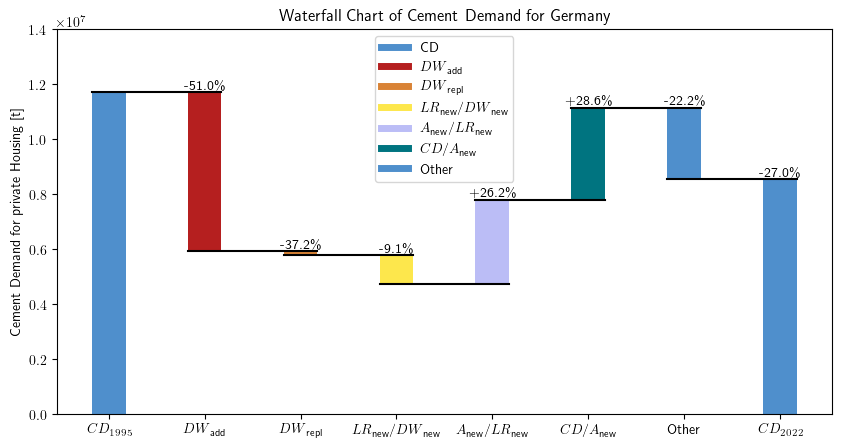

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

start_year = ipat_years[0]
end_year = ipat_years[-1]

# start_year = 2015
# end_year = 2022

labels = [
    f"$CD_{{{start_year}}}$",
    *ipat_labels,
    "Other",
    f"$CD_{{{end_year}}}$",
]

ipat_values = [
    calc_cd(factor, start=start_year, end=end_year) for factor in ipat_factors
]
ipat_values[0] *= data.loc[start_year, "share add"] / 100
ipat_values[1] *= data.loc[start_year, "share repl"] / 100
diff = data.loc[end_year, "CD"] - (sum(ipat_values) + data.loc[start_year, "CD"])
other_text = f"{diff / data.loc[start_year, 'CD']*100:+2.1f}\\%"

waterfall(
    ax,
    np.arange(len(labels)),
    [
        data.loc[start_year, "CD"],
        *ipat_values,
        diff,
        -data.loc[end_year, "CD"],
    ],
    text=[
        "",
        *[
            f"{calc_change(factor, start=start_year, end=end_year)*100:+2.1f}\\%"
            for factor in ipat_factors
        ],
        other_text,
        f"{calc_change('CD', start=start_year, end=end_year) * 100:+2.1f}\\%",
    ],
    colors=[cement_color, *ipat_colors, other_color, cement_color],
    labels=labels,
    title="Waterfall Chart of Cement Demand for Germany",
    width=0.35,
    ylim=(0, 1.4e7),
)

ax.plot([], [], color=cement_color, label="CD", linewidth=legend_line_width)
for label, color in zip(ipat_labels, ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.plot([], [], color=other_color, label="Other", linewidth=legend_line_width)

ax.legend()

ax.set_ylabel("Cement Demand for private Housing [t]")

fig.savefig("figures/waterfall_full_period.pdf")

plt.show()

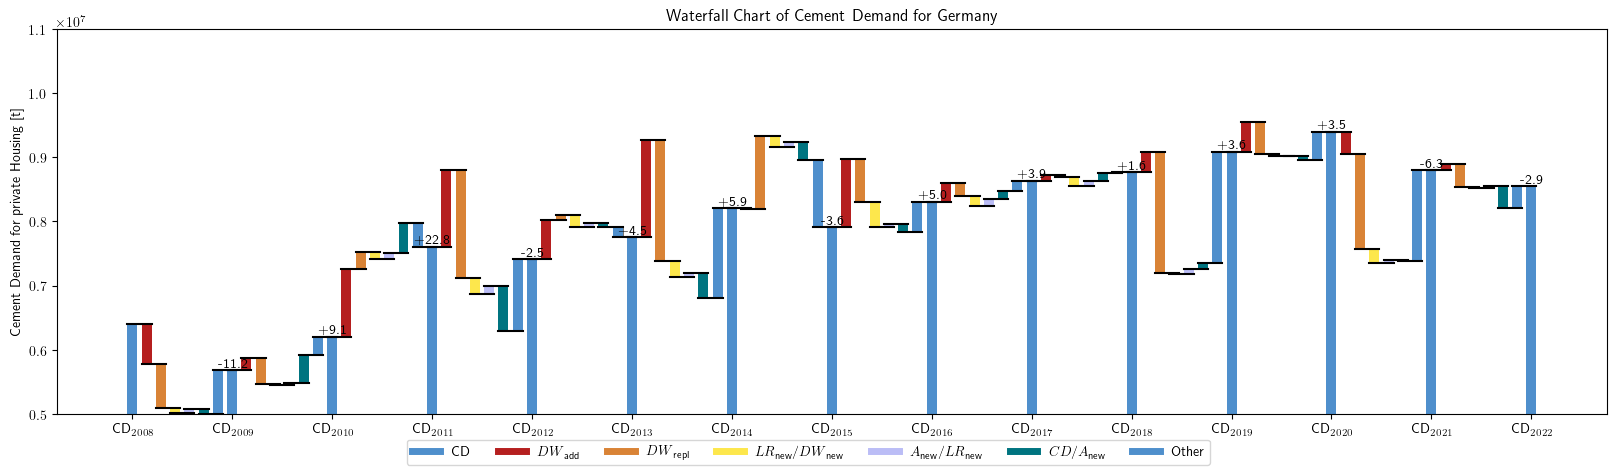

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

# start_years = [2015, 2019]
# end_years = [2019, 2022]

start_years = ipat_years[3:-1]
end_years = ipat_years[4:]

labels = [
    f"$\\text{{CD}}_{{{start_years[0]}}}$",
]
colors = [cement_color]
percentage_change = [""]
values = []
bottoms = []
x = []

for i, (start, end) in enumerate(zip(start_years, end_years)):
    new_values = [data.loc[start, "CD"]] + [
        calc_cd(factor, start=start, end=end) for factor in ipat_factors
    ]
    difference = data.loc[end, "CD"] - sum(new_values)
    new_values.append(difference)

    x += np.linspace(i, i + 1, len(new_values), endpoint=False).tolist()

    y = 0
    for val in new_values:
        bottoms.append(y)
        y += val

    values += new_values

    labels += [f"$\\text{{CD}}_{{{end}}}$"]
    colors += [*ipat_colors, other_color, cement_color]
    # percentage_change += (
    #     [
    #         f"{calc_change(factor, start=start, end=end)*100:+2.1f}"
    #         for factor in ipat_factors
    #     ]
    #     + [f"{difference / data.loc[start, 'CD'] *  100:+2.1f}"]
    #     + [f"{calc_change('CD', start=start, end=end)*100:+2.1f}"]
    # )
    
    percentage_change += [""] * (len(ipat_factors) + 1) + [f"{calc_change('CD', start=start, end=end)*100:+2.1f}"]
    

values += [data.loc[end, "CD"]]
bottoms += [0]
x += [i + 1]

waterfall(
    ax,
    x,
    values,
    bottom=bottoms,
    text=percentage_change,
    colors=colors,
    labels=labels,
    title="Waterfall Chart of Cement Demand for Germany",
    ylim=(5e6, 1.1e7),
)

ax.plot([], [], color=cement_color, label="CD", linewidth=legend_line_width)
for label, color in zip(ipat_labels, ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.plot([], [], color=other_color, label="Other", linewidth=legend_line_width)

ax.set_ylabel("Cement Demand for private Housing [t]")

fig.legend(
    ax.get_legend_handles_labels()[0],
    ax.get_legend_handles_labels()[1],
    loc="lower center",
    ncol=8,
)

fig.savefig("waterfall_total_period_2.png")

plt.show()

In [141]:
def ipat_bars(start, end):
    new_values = [data.loc[start, "CD"]] + [
        calc_cd(factor, start=start, end=end) for factor in ipat_factors
    ]
    new_values[1] *= data.loc[start, "share add"] / 100
    new_values[2] *= data.loc[start, "share repl"] / 100
    difference = data.loc[end, "CD"] - sum(new_values)
    new_values.append(difference)
    
    bottoms = [0]
    for val in new_values[:-1]:
        bottoms.append(val + bottoms[-1])
        
    return new_values, bottoms

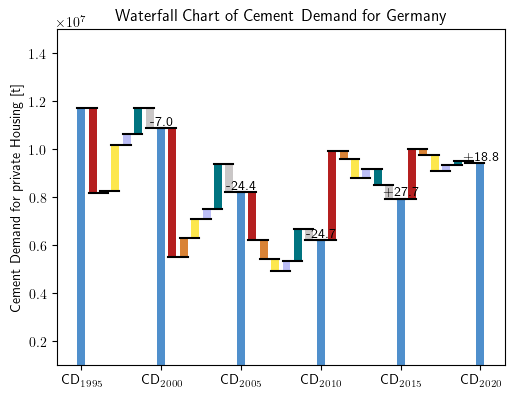

In [177]:
fig, ax = plt.subplots(1, 1, figsize=report_fig_size_one)
fig.subplots_adjust(**report_margins_one)

# start_years = [2015, 2019]
# end_years = [2019, 2022]

start_years = [1995, 2000, 2005, 2010, 2015]
end_years = [2000, 2005, 2010, 2015, 2020]

# start_years = [2015, 2016, 2017, 2018, 2019]
# end_years = [2016, 2017, 2018, 2019, 2020]

labels = [
    f"$\\text{{CD}}_{{{start_years[0]}}}$",
]
colors_ = [cement_color]
percentage_change = [""]
values = []
bottoms = []

for i, (start, end) in enumerate(zip(start_years, end_years)):
    new_values, new_bottoms = ipat_bars(start, end)

    values += new_values
    bottoms += new_bottoms
    labels += [f"$\\text{{CD}}_{{{end}}}$"]
    colors_ += [*ipat_colors, other_color, cement_color]
    
    percentage_change += [""] * (len(ipat_factors) + 1) + [f"{calc_change('CD', start=start, end=end)*100:+2.1f}"]
        

values += [data.loc[end, "CD"]]
bottoms += [0]
x = np.linspace(0, i+1, len(values), endpoint=True)

waterfall(
    ax,
    x,
    values,
    bottom=bottoms,
    text=percentage_change,
    colors=colors_,
    labels=labels,
    title="Waterfall Chart of Cement Demand for Germany",
    ylim=(0.1e7, 1.5e7),
)

ax.plot([], [], color=cement_color, label="CD", linewidth=legend_line_width)
for label, color in zip(ipat_labels, ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.plot([], [], color=other_color, label="Other", linewidth=legend_line_width)

ax.set_ylabel("Cement Demand for private Housing [t]")

# ax.legend(
#     ax.get_legend_handles_labels()[0],
#     ax.get_legend_handles_labels()[1],
#     loc="upper center",
#     ncol=4,
# )

fig.savefig("figures/full_ipat_waterfall_extrapolated.pdf")

plt.show()

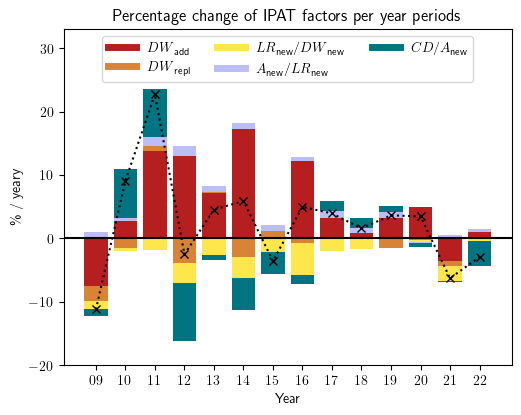

In [183]:
fig, ax = plt.subplots(1, 1, figsize=report_fig_size_one)
fig.subplots_adjust(**report_margins_one)

start_years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
end_years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

labels = []
colors_ = []
percentage_change = []
values = []
bottoms = []
x = []

for i, (start, end) in enumerate(zip(start_years, end_years)):
    new_values = [
        calc_change(factor, start=start, end=end) *100 for factor in ipat_factors
    ]
    new_values[0] *= data.loc[start, "share add"] / 100
    new_values[1] *= data.loc[start, "share repl"] / 100
    # difference = data.loc[end, "CD"] - sum(new_values)
    # new_values.append(difference)
    
    percentage_change += [calc_change('CD', start=start, end=end)*100]
    
    x += [i] * len(new_values)
    
    y_plus = 0
    y_minus = 0
    for val in new_values:
        if val < 0:
            bottoms.append(y_minus)
            y_minus += val
        else:
            bottoms.append(y_plus)
            y_plus += val
    
    values += new_values
    
    labels += [f"${{{end%2000:02}}}$"]
    colors_ += ipat_colors

ax.bar(x, values, bottom=bottoms, color=colors_)
ax.plot(np.arange(len(percentage_change)), percentage_change, 'x:', color='black')
ax.axline((0, 0), (1, 0), c='black')

legend_line_width = 5

for label, color in zip(ipat_labels, ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.set_title("Percentage change of IPAT factors per year periods")

ax.set_xticks(list(range(len(labels))))
ax.set_xticklabels(labels) 

ax.set_xlabel("Year")
ax.set_ylabel("\\% / yeary")
ax.set_ylim(-20, 33)

ax.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], loc="upper center", ncol=3)

fig.savefig("figures/full_ipat_change_yearly.pdf")

plt.show()

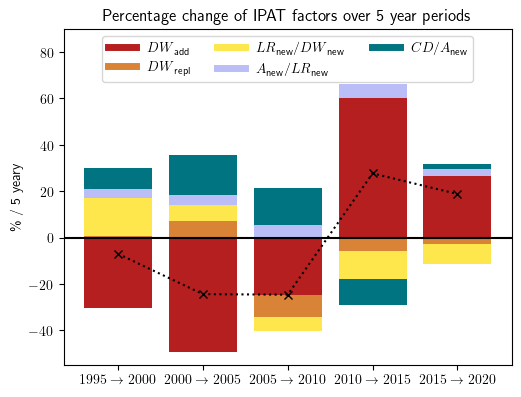

In [186]:
fig, ax = plt.subplots(1, 1, figsize=report_fig_size_one)
fig.subplots_adjust(**report_margins_one)

start_years = [1995, 2000, 2005, 2010, 2015]
end_years = [2000, 2005, 2010, 2015, 2020]

labels = []
colors = []
percentage_change = []
values = []
bottoms = []
x = []

for i, (start, end) in enumerate(zip(start_years, end_years)):
    new_values = [
        calc_change(factor, start=start, end=end) *100 for factor in ipat_factors
    ]
    new_values[0] *= data.loc[start, "share add"] / 100
    new_values[1] *= data.loc[start, "share repl"] / 100
    # difference = data.loc[end, "CD"] - sum(new_values)
    # new_values.append(difference)
    
    percentage_change += [calc_change('CD', start=start, end=end)*100]
    
    x += [i] * len(new_values)
    
    y_plus = 0
    y_minus = 0
    for val in new_values:
        if val < 0:
            bottoms.append(y_minus)
            y_minus += val
        else:
            bottoms.append(y_plus)
            y_plus += val
    
    values += new_values
    
    labels += [f"${{{start} \\rightarrow {end}}}$"]
    colors += ipat_colors

ax.bar(x, values, bottom=bottoms, color=colors)
ax.plot(np.arange(len(percentage_change)), percentage_change, 'x:', color='black')
ax.axline((0, 0), (1, 0), c='black')

legend_line_width = 5

for label, color in zip(ipat_labels, ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.set_ylabel("\\% / 5 yeary")
ax.set_title("Percentage change of IPAT factors over 5 year periods")

ax.set_xticks(list(range(len(labels))))
ax.set_xticklabels(labels) 

ax.set_ylim(-55, 90)

ax.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], loc="upper center", ncol=3)

fig.savefig("figures/full_ipat_change_extrapolated.pdf")

plt.show()

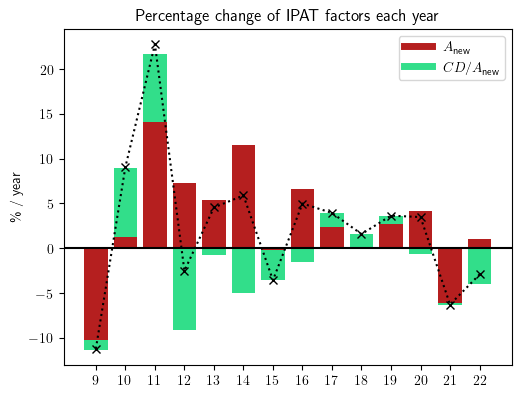

In [203]:
fig, ax = plt.subplots(1, 1, figsize=report_fig_size_one)
fig.subplots_adjust(**report_margins_one)

start_years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
end_years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

labels = []
colors_ = []
percentage_change = []
values = []
bottoms = []
x = []

for i, (start, end) in enumerate(zip(start_years, end_years)):
    new_values = [
        calc_change(factor, start=start, end=end) *100 for factor in small_ipat_factors
    ]
    # difference = data.loc[end, "CD"] - sum(new_values)
    # new_values.append(difference)
    
    percentage_change += [calc_change('CD', start=start, end=end)*100]
    
    x += [i] * len(new_values)
    
    y_plus = 0
    y_minus = 0
    for val in new_values:
        if val < 0:
            bottoms.append(y_minus)
            y_minus += val
        else:
            bottoms.append(y_plus)
            y_plus += val
    
    values += new_values
    
    labels += [f"${{{end%2000}}}$"]
    colors_ += small_ipat_colors

ax.bar(x, values, bottom=bottoms, color=colors_)
ax.plot(np.arange(len(percentage_change)), percentage_change, 'x:', color='black')
ax.axline((0, 0), (1, 0), c='black')

legend_line_width = 5

for label, color in zip(small_ipat_labels, small_ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.set_ylabel("\\% / year")
ax.set_title("Percentage change of IPAT factors each year")

ax.set_xticks(list(range(len(labels))))
ax.set_xticklabels(labels) 

ax.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], loc="upper right")

fig.savefig("figures/small_ipat_change_yearly.pdf")

plt.show()

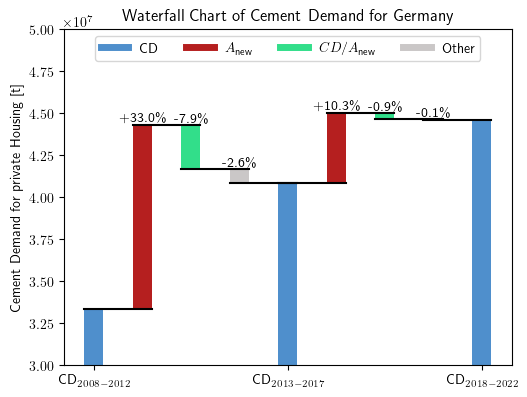

In [196]:
fig, ax = plt.subplots(1, 1, figsize=report_fig_size_one)
fig.subplots_adjust(**report_margins_one)

clustered_years = [
    [2008, 2009, 2010, 2011, 2012],
    [2013, 2014, 2015, 2016, 2017],
    [2018, 2019, 2020, 2021, 2022]
]

data_list = []

for _years in clustered_years:
    data_dict = {col: 0 for col in cols}
    data_dict['start'] = _years[0]
    data_dict['end'] = _years[-1]
    for year in _years:
        for col in cols:
            data_dict[col] += data.loc[year, col]
            
    data_dict['CD / A new'] = data_dict['CD'] / data_dict['A new']
    
    data_list.append(data_dict)
    
values = []
bottoms = []
texts = []
colors_ = []
labels = []

for i in range(len(data_list) - 1):
    dct_start = data_list[i]
    dct_end = data_list[i + 1]
    
    percentage_change = [(dct_end[factor] - dct_start[factor]) / dct_start[factor] * 100 for factor in small_ipat_factors]
    cement_change = [change * dct_start['CD'] / 100 for change in percentage_change]
    cement_other = dct_end['CD'] - sum(cement_change) - dct_start['CD']
    percentage_other = cement_other / dct_start['CD'] * 100
    
    new_values = [dct_start['CD'], *cement_change, cement_other]
    values += new_values
    y = 0
    for val in new_values:
        bottoms.append(y)
        y += val
    
    labels += [f"$\\text{{CD}}_{{{dct_start['start']} - {dct_start['end']}}}$"]
    texts += ["", *[f"{change:+2.1f}\\%" for change in [*percentage_change, percentage_other]]]
    colors_ += [cement_color, *small_ipat_colors, other_color]

labels = [f"$\\text{{CD}}_{{{dct['start']} - {dct['end']}}}$" for dct in data_list]

values += [data_list[-1]['CD']]
bottoms += [0]
colors_ += [cement_color]

x = np.linspace(0, len(data_list) - 1, len(values), endpoint=True).tolist()
        
waterfall(
    ax,
    x,
    values,
    bottom=bottoms,
    text=texts,
    colors=colors_,
    labels=labels,
    title="Waterfall Chart of Cement Demand for Germany",
    ylim=(3e7, 5e7),
)

ax.plot([], [], color=cement_color, label="CD", linewidth=legend_line_width)
for label, color in zip(small_ipat_labels, small_ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.plot([], [], color=other_color, label="Other", linewidth=legend_line_width)

ax.legend(ncol=4, loc="upper center")

ax.set_ylabel("Cement Demand for private Housing [t]")

fig.savefig("figures/small_ipat_waterfall_periods.pdf")

plt.show()

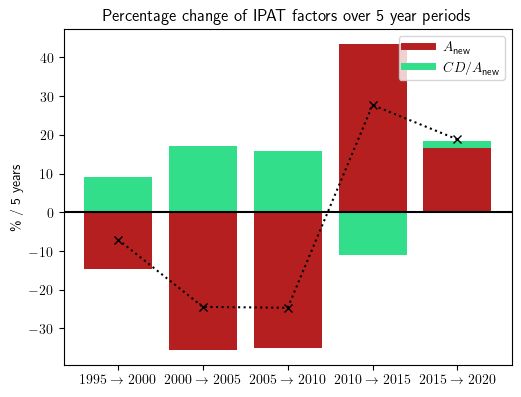

In [192]:
fig, ax = plt.subplots(1, 1, figsize=report_fig_size_one)
fig.subplots_adjust(**report_margins_one)

start_years = [1995, 2000, 2005, 2010, 2015]
end_years = [2000, 2005, 2010, 2015, 2020]

labels = []
colors_ = []
percentage_change = []
values = []
bottoms = []
x = []

for i, (start, end) in enumerate(zip(start_years, end_years)):
    new_values = [
        calc_change(factor, start=start, end=end) *100 for factor in small_ipat_factors
    ]
    # difference = data.loc[end, "CD"] - sum(new_values)
    # new_values.append(difference)
    
    percentage_change += [calc_change('CD', start=start, end=end)*100]
    
    x += [i] * len(new_values)
    
    y_plus = 0
    y_minus = 0
    for val in new_values:
        if val < 0:
            bottoms.append(y_minus)
            y_minus += val
        else:
            bottoms.append(y_plus)
            y_plus += val
    
    values += new_values
    
    labels += [f"${{{start} \\rightarrow {end}}}$"]
    colors_ += small_ipat_colors

ax.bar(x, values, bottom=bottoms, color=colors_)
ax.plot(np.arange(len(percentage_change)), percentage_change, 'x:', color='black')
ax.axline((0, 0), (1, 0), c='black')

legend_line_width = 5

for label, color in zip(small_ipat_labels, small_ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.set_ylabel("\\% / 5 years")
ax.set_title("Percentage change of IPAT factors over 5 year periods")

ax.set_xticks(list(range(len(labels))))
ax.set_xticklabels(labels) 

ax.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], loc="upper right")

fig.savefig("figures/small_ipat_change_extrapolated.pdf")

plt.show()

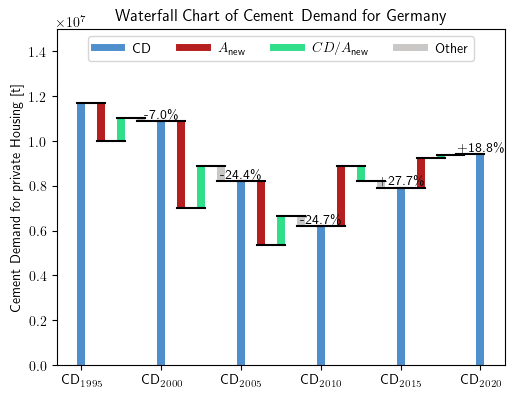

In [197]:
fig, ax = plt.subplots(1, 1, figsize=report_fig_size_one)
fig.subplots_adjust(**report_margins_one)

start_years = [1995, 2000, 2005, 2010, 2015]
end_years = [2000, 2005, 2010, 2015, 2020]

labels = [
    f"$\\text{{CD}}_{{{start_years[0]}}}$",
]
colors_ = [cement_color]
percentage_change = [""]
values = []
bottoms = []
x = []

for i, (start, end) in enumerate(zip(start_years, end_years)):
    new_values = [data.loc[start, "CD"]] + [
        calc_cd(factor, start=start, end=end) for factor in small_ipat_factors
    ]
    difference = data.loc[end, "CD"] - sum(new_values)
    new_values.append(difference)

    x += np.linspace(i, i + 1, len(new_values), endpoint=False).tolist()

    y = 0
    for val in new_values:
        bottoms.append(y)
        y += val

    values += new_values

    labels += [f"$\\text{{CD}}_{{{end}}}$"]
    colors_ += [*small_ipat_colors, other_color, cement_color]
    # percentage_change += (
    #     [
    #         f"{calc_change(factor, start=start, end=end)*100:+2.1f}"
    #         for factor in ipat_factors
    #     ]
    #     + [f"{difference / data.loc[start, 'CD'] *  100:+2.1f}"]
    #     + [f"{calc_change('CD', start=start, end=end)*100:+2.1f}"]
    # )
    
    percentage_change += [""] * (len(small_ipat_factors) + 1) + [f"{calc_change('CD', start=start, end=end)*100:+2.1f}\\%"]
    

values += [data.loc[end, "CD"]]
bottoms += [0]
x += [i + 1]

waterfall(
    ax,
    x,
    values,
    bottom=bottoms,
    text=percentage_change,
    colors=colors_,
    labels=labels,
    title="Waterfall Chart of Cement Demand for Germany",
    ylim=(0, 1.5e7),
)

ax.plot([], [], color=cement_color, label="CD", linewidth=legend_line_width)
for label, color in zip(small_ipat_labels, small_ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.plot([], [], color=other_color, label="Other", linewidth=legend_line_width)

ax.set_ylabel("Cement Demand for private Housing [t]")

ax.legend(
    ax.get_legend_handles_labels()[0],
    ax.get_legend_handles_labels()[1],
    loc="upper center",
    ncol=4,
)

fig.savefig("figures/small_ipat_waterfall_extrapolated.pdf")

plt.show()

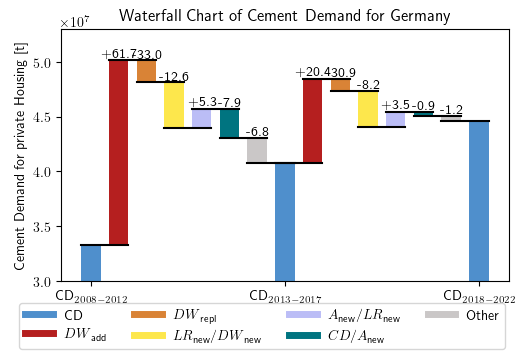

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 3.6))
fig.subplots_adjust(**report_margins_one)

clustered_years = [
    [2008, 2009, 2010, 2011, 2012],
    [2013, 2014, 2015, 2016, 2017],
    [2018, 2019, 2020, 2021, 2022]
]

data_list = []

columns = ['DW new', 'DW add', 'DW repl', 'LR new', 'A new', 'CD']

for _years in clustered_years:
    data_dict = {col: 0 for col in columns}
    data_dict['start'] = _years[0]
    data_dict['end'] = _years[-1]
    for year in _years:
        for col in columns:
            data_dict[col] += data.loc[year, col]
    
    # data_dict['DW add'] = data_dict['DW add'] * data_dict['DW add'] / data_dict['DW new']
    # data_dict['DW repl'] = data_dict['DW repl'] * data_dict['DW repl'] / data_dict['DW new']
        
    data_dict['LR new / DW new'] = data_dict['LR new'] / data_dict['DW new']
    data_dict['A new / LR new'] = data_dict['A new'] / data_dict['LR new']
    data_dict['CD / A new'] = data_dict['CD'] / data_dict['A new']
    
    data_list.append(data_dict)
    
values = []
bottoms = []
texts = []
colors_ = []
labels = []

for i in range(len(data_list) - 1):
    dct_start = data_list[i]
    dct_end = data_list[i + 1]
    
    percentage_change = [(dct_end[factor] - dct_start[factor]) / dct_start[factor] * 100 for factor in ipat_factors]
    
    texts += ["", *[f"{change:+2.1f}" for change in percentage_change]]
    
    percentage_change[0] *= dct_start['DW add'] / dct_start['DW new']
    percentage_change[1] *= dct_start['DW repl'] / dct_start['DW new']
    cement_change = [change * dct_start['CD'] / 100 for change in percentage_change]
    cement_other = dct_end['CD'] - sum(cement_change) - dct_start['CD']
    percentage_other = cement_other / dct_start['CD'] * 100
    
    new_values = [dct_start['CD'], *cement_change, cement_other]
    values += new_values
    y = 0
    for val in new_values:
        bottoms.append(y)
        y += val
    
    labels += [f"$\\text{{CD}}_{{{dct_start['start']} - {dct_start['end']}}}$"]
    texts += [f"{percentage_other:+2.1f}"]
    colors_ += [cement_color, *ipat_colors, other_color]

labels = [f"$\\text{{CD}}_{{{dct['start']} - {dct['end']}}}$" for dct in data_list]

values += [data_list[-1]['CD']]
bottoms += [0]
colors_ += [cement_color]

x = np.linspace(0, len(data_list) - 1, len(values), endpoint=True).tolist()
    
waterfall(
    ax,
    x,
    values,
    bottom=bottoms,
    text=texts,
    colors=colors_,
    labels=labels,
    title="Waterfall Chart of Cement Demand for Germany",
    ylim=(3e7, 5.3e7),
)

ax.plot([], [], color=cement_color, label="CD", linewidth=legend_line_width)
for label, color in zip(ipat_labels, ipat_colors):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.plot([], [], color=other_color, label="Other", linewidth=legend_line_width)

fig.legend(loc="lower center", ncols=4)

ax.set_ylabel("Cement Demand for private Housing [t]")

fig.savefig("figures/full_ipat_waterfall_periods.pdf")

plt.show()

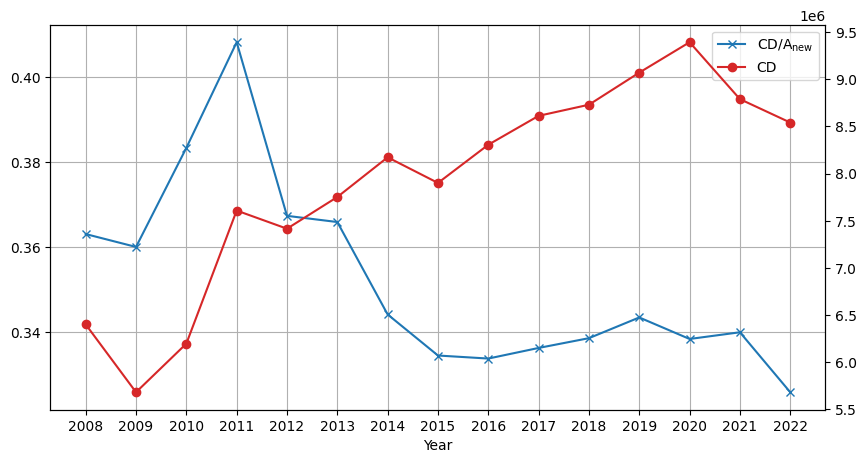

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

plot(
    ax,
    data1=data.loc[years, ipat_factors[-1]],
    xlabel="Year",
    label=ipat_labels[-1],
    data2=data.loc[years, "CD"],
    label2="CD",
    two_axis=True,
)

plt.show()

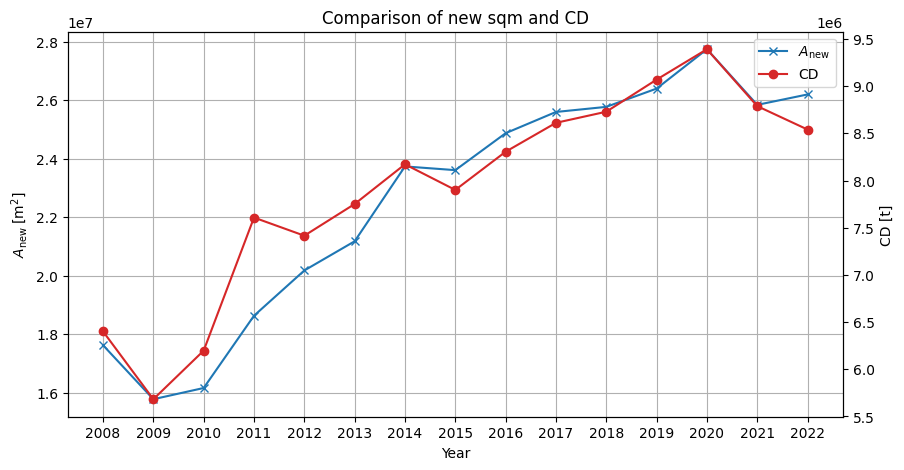

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

plot(
    ax,
    data1=data.loc[years, "new sqm"],
    xlabel="Year",
    label=r"$A_\text{new}$",
    ylabel=r"$A_\text{new} \; [\text{m}^2]$",
    data2=data.loc[years, "CD"],
    label2="CD",
    ylabel2="CD [t]",
    two_axis=True,
    title="Comparison of new sqm and CD",
)

fig.savefig("sqm_cd.png")

plt.show()